<a href="https://colab.research.google.com/github/ArielZee/code/blob/master/Udemy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome

<div style='background:lightgreen;font-size:15px'> 
    
The purpose of this notebook is to provide you with a simple, beginner-friendly, and easy-to-understand EDA "template"  you can use in order to conduct your own data analysis.
<br>
    
What is an EDA ? <br>
* EDA is an approach to understanding data using visualization and statistical tools. Think of EDA as your initial interaction with data.
* EDA allows us to assess and validate assumptions. In which future inferences will be based. So we might ask questions like which variables are normally distributed, or we might be wondering if a variable is biased toward a particular value.
* EDA allows us to understand the data before performing and intelligent hypothesis. Well EDA can be the source of an idea for an experiment. It's not a formal process of hypothesis testing and predictive modelling. 
Ultimately, we're developing intuition of our data set and how it came into existence

Things to keep in mind as you read this:

* <b> Analysis Methods </b> - Analysis methods such as T-Test, ANOVA, Correlations etc., are beyond the scope of this notebook. The main focus here will be on Descriptive Statitics
* <b> Visualization Methods </b> - There are numerous ways to visualize data and relations between different variables, this notebook describes the most basic and common techniques
* <b> Analysis Platform </b> - Although Python is highly recommended for this kind of process, you can easily replicate most of the steps described here to Excel / SQL / Power BI / Tableau, etc. 

# Learn More About Pandas

https://www.youtube.com/watch?v=TjKmXxKB_kM&t=26s

# Join the Full Training Program!

* 2.5 months of intensive Python Data Analysis training
* Learn by doing , and perform hundreds of tasks spread across multiple datasets
* Build your own Python data analysis portfolio
* Ongoing assistance with all questions, both during and after the course
* Next training starts at 01/03/20222

https://bit.ly/pandas-for-non-programmers

# Udemy Exploratory Data Analysis (EDA)

## Introduction

### About the Dataset

* Udemy, Inc. is a major open online course provider aimed at working adults and students in the United States.
* Eren Bali, Gagan Biyani, and Oktay Caglar formed it in May 2010.
* The platform has over 35 million students and 57,000 instructors delivering courses in over 65 languages as of January 2020. 

### Tasks

* To conduct a general EDA, and further understand Udemy's dataset / develop intuition of our data
* Performance in perspective of time
* Deep dive into Web-Development courses

## Preparation

### Loading the Libraries

Loading Python relevant libraries

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import helpers

### Specific Notebook Parameters

In [ ]:
pd.set_option('max_colwidth', 400)
plt.style.use('ggplot')

### Loading the Data

Loading the Udemy dataset into a DataFrame

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RamKedem/Datasets/main/udemy_courses.csv')

### Understanding the Data

A few basic details - what is the data-shape in terms of columns & rows, and what details can be found in each column

#### Data Shape

In [ ]:
print(f'This Dataframe has {df.shape[0]} rows over {df.shape[1]} columns')

#### Sampling some rows

In [ ]:
df.sample(3)

#### Data Dictionary

* <b>course_id </b>- course number
* <b>course_</b> - course title
* <b>url </b>- course url
* <b>is_paid </b>- whether the course is free or paid
* <b>price </b>- course price
* <b>num_subscribers </b>- umber of subscribers
* <b>num_reviews </b>- number of reviews
* <b>num_lectures </b>- number of lectures
* <b>level - </b> course difficulty
* <b>content_duration </b>- duration of all course materials

### Cleanup

In the following section we'll remove unnecessary columns and deal with empty and duplicated rows. 

#### Null Values

This dataset doesn't contain any NaN values, so further cleanup in this area is not required

In [ ]:
df.isnull().sum()

#### Validating Datatypes

In [ ]:
df.info()

Transforming the published_timestamp into a valid datetime object

In [ ]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [ ]:
df.info()

#### Duplicates Rows

In [ ]:
df.nunique()

Number of unique values in course_id & course_titles should be equal to the number of rows - 3678. <br> 
Lets undertand the reason its not

In [ ]:
df[df.duplicated()].head()

There are several duplicated rows, so lets get rid of them

In [ ]:
df.drop_duplicates(inplace=True)

Check again

In [ ]:
df.nunique()

The number of values in course_title is still different than num_of_rows. Lest try to understand why 

In [ ]:
df[df.duplicated(subset=['course_title'])].head(2)

We can see that different courses may have the exact same name. so number of values in course_title <> num_of_rows is not be a real problem

#### Drop unnecessary columns

the course_id, and url do not contain any usefull data for this analysis, so we can drop them.

In [ ]:
df.drop(['course_id','url'], axis=1, inplace=True)

#### Creating a cleanup function for future reads

In [ ]:
def load_udemy():
    url = 'https://raw.githubusercontent.com/RamKedem/Datasets/main/udemy_courses.csv'
    df = pd.read_csv(url, parse_dates = ['published_timestamp'])
    df.drop_duplicates(inplace=True)
    df.drop(['course_id','url'], axis=1, inplace=True)
    return df 

In [ ]:
df = load_udemy()

## EDA

### Categorical, Quantitative

Variables can be classified as categorical or quantitative, each type requires a different handling
* <b> Categorical variable </b> : Names or labels (i.e., categories) with no logical order (<u>nominal</u>, hair color, type of dog, city etc.,) or with a logical order but inconsistent differences between groups  / no quantitive meaning (<u>ordinal</u>, rating surveys in restaurants, laptop preference)
* <b> Quantitative variable </b> : Numerical values with quantitive meaning that can be placed in a meaningful order with consistent intervals.



In [ ]:
categorical = ['level','subject','is_paid']
numerical   = ['content_duration', 'price','num_reviews','num_lectures','num_subscribers']

### Univariate Analysis

#### Summary Statistics

In [ ]:
df.describe().transpose()

In [ ]:
# helpers.get_numeric_details(df[numerical])

#### Summary Statistics Observations

<div style='background:coral;font-size:15px'> 

<b> Initial Observations: </b>
* <b> content_duration </b>
    * There are courses no content duration (?) next section will remove those rows
    * The maximum duration of content of a single course is 78.5 hours (?) that sounds a bit too much, we'll look into that in the next section
* <b> price </b>
    * The courses ranged in price from 0 to 200 usd, most of the prices (75%) are up to 95 usd
* <b> reviews / subscribers </b>
    * There are courses with no subscribers, and just a few (less than 25%) have more than 2600.
    * The maximum number of reviews is ten times lower than the maximum number of subscribers
    * Looks like Udemy courses are an all or nothing game
    * The maximum num_reviews & num_subscribers is huge, considering the 75% percentiles, we should check these values also
* <b> Data Distribution </b>
    * Just by looking at the summary statistics we can see that all mean values are significantly higher than median values. <br>
    This indicates that all numeric variables are positivly skewed
    * The following sections will visualize these distributions

</div>

<b> Validating courses with high content_duration </b> <br>
We can see that courses with a high amount of hours also have a large number of lectures, which appears to be reasonable. 

In [ ]:
content_duration_filter = df['content_duration'] > 70
df[content_duration_filter].head(2)

<b> Validating courses with high number of reviews </b>

In [ ]:
content_duration_filter = df['num_reviews'] > 25000
df[content_duration_filter].head(2)

<b> Validating courses with high number of subscribers </b>

In [ ]:
content_duration_filter = df['num_subscribers'] > 200000
df[content_duration_filter].head(2)

<b> Dropping courses with 0 duration </b>

In [ ]:
content_duration_filter = df['content_duration'] == 0
df.drop(df[content_duration_filter].index, inplace=True)

#### Visualizing the Data Distribution

In [ ]:
for column in numerical:
    helpers.show_distribution(df,column)

#### Dealing with Outliers

When it is appropriate to drop an outlier is beyond the scope of this notebook; however, in this notebook we'll demonstrate a simple method for detecting and deleting them. <br>

Outliers: To Drop or Not to Drop <br>
https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/ <br>

In [ ]:
col = 'num_reviews'

q1  = df[col].quantile(.25)
q3  = df[col].quantile(.75)
iqr = q3-q1
right_bound = df[col] < (q3 + iqr * 1.5) 
left_bound  = df[col] > (q1 - iqr * 1.5)

df = df[left_bound & right_bound]

In [ ]:
col = 'num_subscribers'

q1  = df[col].quantile(.25)
q3  = df[col].quantile(.75)
iqr = q3-q1
price_filter  = df[col] > (q3 + iqr * 1.5)

df = df[price_filter]

#### Categorical Counts

##### Available courses by each level
The various courses are divided into four distinct levels:
* All Levels
* Beginner Level
* Intermediate Level
* Expert Level

In [ ]:
g1 = df.groupby('level').agg(number_of_courses = ('level','size'),
                             pct = ('level',lambda x:x.count() / df['level'].size))\
.sort_values('pct', ascending=False)

g2 = df.agg(number_of_courses = ('level','size'),
        pct = ('level',lambda x:x.count() / df['level'].size)).transpose()\
.rename(index={'level': 'Total'})

res = pd.concat([g1,g2])
res.assign(number_of_courses = res['number_of_courses'].astype(int))\
.style.format({'pct': "{:.2%}"})

##### Available courses by each subject

The various courses are divided into four distinct subjects:
* Web Development
* Business Finance
* Musical Instruments
* Graphic Design

In [ ]:
g1 = df.groupby('subject').agg(number_of_courses = ('subject','size'))
g1['pct'] = g1['number_of_courses']/g1['number_of_courses'].sum()
g1

In [ ]:
g2 = df.agg(number_of_courses = ('subject','size'))
g2.rename(index={'number_of_courses': 'Total'}, inplace=True)
g2.rename(columns = {'subject':'number_of_courses'}, inplace=True)
g2['pct'] = g2['number_of_courses']/g2['number_of_courses'].sum()
g2

In [ ]:
res = pd.concat([g1,g2])
res.assign(number_of_courses = res['number_of_courses'].astype(int))\
.style.format({'pct': "{:.2%}"})

##### Available free / paid course 
Some of the available courses are free, while others require payment. 

In [ ]:
g1 = df.groupby('is_paid').agg(number_of_courses = ('is_paid','size'),
                             pct = ('is_paid',lambda x:x.count() / df['level'].size))\
.sort_values('pct', ascending=False)

g2 = df.agg(number_of_courses = ('is_paid','size'),
        pct = ('is_paid',lambda x:x.count() / df['is_paid'].size)).transpose()\
.rename(index={'is_paid': 'Total'})

res = pd.concat([g1,g2])
res.assign(number_of_courses = res['number_of_courses'].astype(int))\
.style.format({'pct': "{:.2%}"})

In [ ]:
for column in categorical:
    helpers.show_counts(df,column)

#### Categorical Counts Observations

<div style='background:coral;font-size:15px'> 

<b> Observations: </b>

* We can see that this market is being dominated by course for <b> All Levels </b> (53%).
* Most popular subjects are <b> Web Development </b> (32.6%) <b> and Business Finance </b>  (32.4%)
* Most courses are <b> paid </b> (91%)
    
</div>

### Bivariate Analysis

In the following section we'll attempt to explore the price-influencing factors <br>
Since we're going to deal with paid-courses, the free courses will be taken out of the equation

In [ ]:
cols = ['course_title', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject']

paid_filter = df['is_paid']==True
paid_courses = df[cols][paid_filter]

paid_filter = df['is_paid']==False
free_courses = df[cols][paid_filter]

# paid_courses['engagement'] = paid_courses['num_reviews'] / paid_courses['num_subscribers']
# paid_courses['published_year'] = paid_courses['published_timestamp'].dt.year

#### numeric to numeric

The following chart demonstrates the correlation (pearson) between the different numeric features. <br>
There are several assumptions that should be taken into cosideration when performing this kind of calculation: <br>
https://www.scribbr.com/frequently-asked-questions/assumptions-of-pearson-correlation-coefficient/
<br> These are beyond the scope of this notebook

In [ ]:
# plt.figure(figsize=(15,8))
sns.heatmap(paid_courses.corr(), annot=True)\
.set(title = 'Correlation Chart');

Visaulizing the correlation of num_subscribers & num_reviews

In [ ]:
sns.scatterplot(data=paid_courses, x='num_subscribers', y='num_reviews')\
.set(title = 'num_subscribers / num_reviews');

#### Numeric to Numeric Observations

<div style='background:coral;font-size:15px'> 
<b> Observations </b> 
<ul>
    <li> The amount of reviews and the number of subscribers have a positive relationship </li>
    <li> There isn't much of a relation between pricing and subscription count. </li>
  <li> There is a positive relationship between the number of lectures and the duration of the topic. </li>
</ul>
</div>

#### categorical to numeric

##### Price  & Popularity by Level - Numeric Details

In [ ]:
paid_courses.groupby('level').agg(min_price = ('price','min'),
                          q25 = ('price',lambda c:c.quantile(.25)),
                          mean_price = ('price','mean'),
                          median_price = ('price','median'),
                          q75 = ('price',lambda c:c.quantile(.75)),
                          max_price = ('price','max'),
                          iqr = ('price', lambda c:c.quantile(.75)-c.quantile(.25)),
                          price_range = ('price', lambda c:c.max()-c.min()),
                          std = ('price','std'),
                          subscriber_cnt = ('num_subscribers','sum'))\
.sort_values('median_price', ascending=False)

##### Visualizing Price by level

In [ ]:
levels_order = paid_courses.groupby('level')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(15,8))
sns.boxplot(data=paid_courses, x='price', y='level', 
            showmeans=True, meanline=True, meanprops={'color':'white'},order=levels_order)\
.set(title = 'Price by Level');

##### Visaulizing Popularity by Level

In [ ]:
subject_order = paid_courses.groupby('level')['num_subscribers'].sum().sort_values(ascending=False).index

plt.figure(figsize=(15,8))
sns.barplot(data=paid_courses, 
            y='num_subscribers', 
            x='level',
            estimator=sum,
            order = subject_order)\
.ticklabel_format(style='plain', axis='y');

##### Price & Popularity by Level - Observations

<div style='background:coral;font-size:15px'> 

<b> Observations </b>
    
<u> Price </u>
* The Expert-Level courses are the most expensive, and contain the highest median and mean prices. 
* The Beginner-Level courses are the cheapest, and contain the lowest median and mean prices

  
<u> Popularity </u>
* The Expert-Level courses contain the lowest amount of subscribers.
* The All-Level courses contain the largest amount of subscribers

</div>

##### Price & Popularity by Subject - Numeric Details

In [ ]:
paid_courses.groupby('subject').agg(min_price = ('price','min'),
                          q25 = ('price',lambda c:c.quantile(.25)),
                          mean_price = ('price','mean'),
                          median_price = ('price','median'),
                          q75 = ('price',lambda c:c.quantile(.75)),
                          max_price = ('price','max'),
                          iqr = ('price', lambda c:c.quantile(.75)-c.quantile(.25)),
                          price_range = ('price', lambda c:c.max()-c.min()),
                          std = ('price','std'),
                          subscriber_cnt = ('num_subscribers','sum'))\
.sort_values('median_price', ascending=False)

##### Visualizing Price by Subject

In [ ]:
subject_order = paid_courses.groupby('subject')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(15,8))
sns.boxplot(data=paid_courses, 
            x='price', 
            y='subject', 
            showmeans=True, 
            meanline=True, 
            meanprops={'color':'white'},
            order = subject_order);

##### Visualizing Subscribers by subject 

In [ ]:
subject_order = paid_courses.groupby('subject')['num_subscribers'].sum().sort_values(ascending=False).index

plt.figure(figsize=(15,8))
sns.barplot(data=paid_courses, 
            y='num_subscribers', 
            x='subject',
            estimator=sum,
            order = subject_order)\
.ticklabel_format(style='plain', axis='y');

##### Subscribers & Price by Subject - Observations

<div style='background:coral;font-size:15px'> 

<b> Observations </b>
    
<u> Price </u>
* The Web-Development courses are the most expensive. 
* The Musical Instruments courses have the lowest average price


<u> Popularity </u>
* The Web Development courses are, by far, the most popular on Udemy
* The Musical Instruments courses are the least popluar
</div>

###### Subscribers & Price by Subject & level

In [ ]:
paid_courses.groupby(['subject','level']).agg(min_price = ('price','min'),
                          q25 = ('price',lambda c:c.quantile(.25)),
                          mean_price = ('price','mean'),
                          median_price = ('price','median'),
                          q75 = ('price',lambda c:c.quantile(.75)),
                          max_price = ('price','max'),
                          iqr = ('price', lambda c:c.quantile(.75)-c.quantile(.25)),
                          price_range = ('price', lambda c:c.max()-c.min()),
                          subscriber_cnt = ('num_subscribers','sum'))\
.sort_values('min_price',ascending=False)

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=paid_courses, y='price', 
            x='subject', hue='level', 
            showmeans=True, meanline=True, meanprops={'color':'white'}, orient='v')\
.set(title = 'Price by level & subject');

In [ ]:
print('Subcribers by subject & level')
plt.figure(figsize=(15,8))
ax = sns.barplot(data=paid_courses, 
            y='num_subscribers', 
            x='subject',
            hue='level',
            estimator=sum,
            order = subject_order)\
.ticklabel_format(style='plain', axis='y');

###### Subscribers & Price by Subject & level - Observations

<div style='background:coral;font-size:15px'> 

<b> Observations </b>
    
<u> Price </u>
* We already saw that the Web-Devlopment courses have the highest price tag. Now we can also see that it these prices are kept at all levels
* It is interesting to see that the prices of Expert / Bussiness Finance courses are greater than the prices of some other Web-Development courses 
* While you can find any course from any level at the price of 20  Expert Web-Devlopment courses are the only ones starting at 50
    
<u> Popularity </u>
* We already saw that the Web-Development and All-Level courses are the most popular, so its not a supprise that the combination of both yields the highest subject/level popularity
</div>

#### categorical to categorical

Considering the amount of courses by each level and subject. Is there a difference between observed data and expected data ? and if so, is it due to chance, or if it is due to a relationship between those variables

In [ ]:
sns.heatmap(pd.crosstab(df['subject'], df['level']), annot=True, fmt='g');

### Time Series Analysis

We cannot make any assumptions on 2017, because our data does not fully cover this year. 

In [ ]:
df['published_timestamp'].max()

Timestamp('2017-07-06 21:46:30+0000', tz='UTC')

#### Number of courses published every year

In [ ]:
df.assign(year_published = df['published_timestamp'].dt.year)\
.groupby(['year_published'])\
.agg(num_courses = ('course_title','size'))

In [ ]:
df.assign(year_published = df['published_timestamp'].dt.year)\
.groupby(['year_published'])\
.agg(num_courses = ('course_title','size'))\
.plot();

<div style='background:coral;font-size:15px'> 

We can see that the number of published courses increased significantly by each year.
    
</div>

#### Number of published courses by each subject

In [ ]:
df.assign(year_published = df['published_timestamp'].dt.year)\
.groupby(['year_published','subject'])\
.agg(num_courses = ('course_title','size'))

In [ ]:
gb = df.assign(year_published = df['published_timestamp'].dt.year)\
.groupby(['year_published','subject'])\
.agg(num_courses = ('course_title','size'))

sns.lineplot(data=gb, x='year_published', y='num_courses', hue='subject');

In [ ]:
gb = df.assign(year_published = df['published_timestamp'].dt.year)\
.groupby(['year_published','subject'])\
.agg(avg_duration = ('num_subscribers','sum'))

sns.lineplot(data=gb, x='year_published', y='avg_duration', hue='subject');

<div style='background:coral;font-size:15px'> 

According to the line plot, Udemy courses on Web Development and Business Finance have significantly increased since 2015.
The number of Business Finance related courses remained nearly constant in 2016, while Web Development related courses increased significantly. 
    
</div>

#### Number of published paid / free courses

In [ ]:
df.assign(year_published = df['published_timestamp'].dt.year)\
.groupby(['year_published','is_paid'])\
.agg(num_courses = ('course_title','size'))

In [ ]:
gb = df.assign(year_published = df['published_timestamp'].dt.year)\
.groupby(['year_published','is_paid'])\
.agg(num_courses = ('course_title','size'))

sns.lineplot(data=gb, x='year_published', y='num_courses', hue='is_paid');

<div style='background:coral;font-size:15px'> 

Each year, the number of free and paid courses grows.
Though there hasn't been much of an increase in the number of free courses.
    
</div>

### Deep Dive into Web-Development Courses

In [ ]:
df['Technology'] = None

list_of_topics = set(['django', 'wordpress', 'solidity', 'typescript', 'vue js', 
                  'responsive design', 'ethereum', 'python', 'asp.net core', 
                  'microservices', 'javascript', 'react', 'css', 'angular', 'node.js', 
                  'html5', 'php', 'jquery', 'html5', 'html5/css3', 'node.js', 'spring','aws',
                  'react.js','ruby','html','xml','vue','joomla','s3','asp.net','css3',
                  'drupal','ajax','json','reactjs','angularjs','angular','bootstrap','amazon','excel'])

titles = df['course_title'][df['subject']=='Web Development']

for title in titles:
    title_to_check = set(title.lower().replace(':','').replace(',',' ').replace('/',' ').replace('!','')
                         .replace('html5','html').replace('css3','css').split(' '))
    inter = list_of_topics.intersection(title_to_check)
    if len(inter) > 0:
        title_filter = df['course_title'] == title
        df.loc[title_filter,'Technology'] = ' | '.join(inter)

In [ ]:
df['Technology'] = df['Technology'].str.replace('html5','html').str.replace('css3','css')

In [ ]:
df[['course_title','Technology','price','num_subscribers']][df['subject']=='Web Development'].head(5)

,course_title,Technology,price,num_subscribers
2478,Learn Web Designing & HTML5/CSS3 Essentials in...,html | css,75,43285
2479,Learning Dynamic Website Design - PHP MySQL an...,javascript | php,50,47886
2480,ChatBots: Messenger ChatBot with API.AI and No...,node.js,50,2577
2481,Projects in HTML5,html,60,8777
2482,Programming Foundations: HTML5 + CSS3 for Entr...,html | css,20,23764


In [ ]:
df.shape

(3672, 11)

#### Subscriber count by multiple subjects

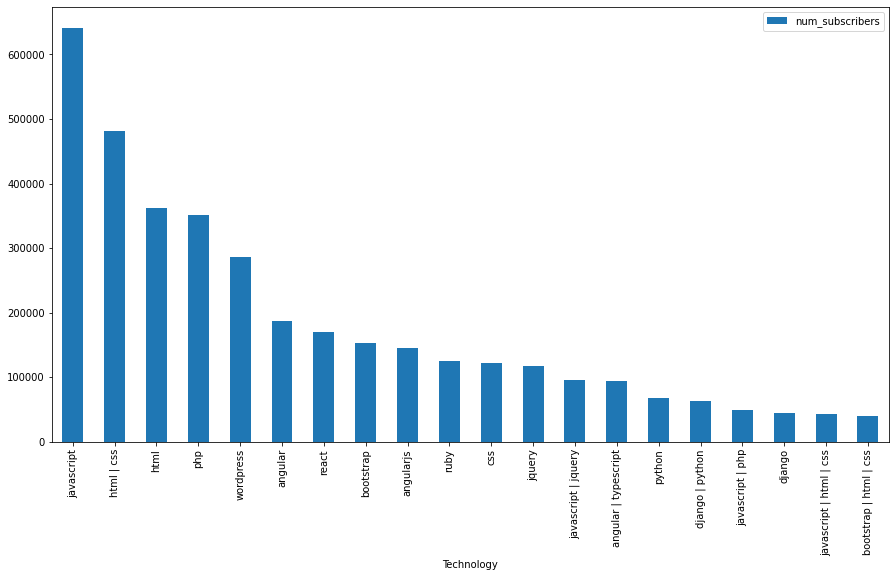

In [ ]:
paid_filter = df['is_paid']==True
web_dev     = df['subject']=='Web Development'

df[paid_filter & web_dev].groupby(df['Technology'])\
.agg(num_subscribers = ('num_subscribers','sum'))\
.sort_values('num_subscribers',ascending=False)\
.head(20)\
.plot(kind='bar', figsize=(15,8));

#### Subscriber count by a single subject

In [ ]:
paid_filter = df['is_paid']==True
web_dev     = df['subject']=='Web Development'

df['Technology_LST'] = df['Technology'].str.split(' \| ')

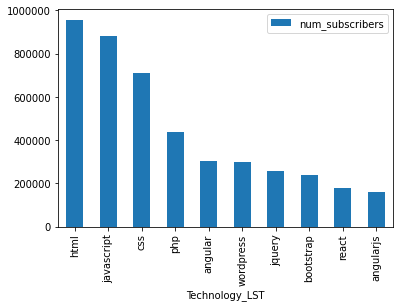

In [ ]:
df[paid_filter & web_dev][['course_title', 'num_subscribers', 'Technology_LST']].explode('Technology_LST')\
.groupby('Technology_LST')\
.agg(num_subscribers = ('num_subscribers', 'sum'))\
.sort_values('num_subscribers', ascending=False)\
.head(10)\
.plot(kind='bar')\
.ticklabel_format(style='plain', axis='y');

#### Performance over Time

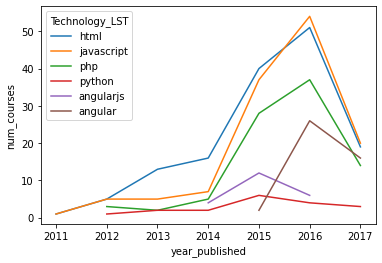

In [ ]:
dt = df[paid_filter & web_dev][['course_title', 'num_subscribers', 'Technology_LST']]\
.assign(year_published = df['published_timestamp'].dt.year)\
.explode('Technology_LST')\

spec = dt['Technology_LST'].str.contains('python|html|angular|php|javascript', na=False)

gb = dt[spec]\
.groupby(['year_published','Technology_LST'])\
.agg(num_courses = ('course_title', 'size'))\

sns.lineplot(data=gb, x='year_published', y='num_courses',hue='Technology_LST');

### Python Tips & Tricks

In [ ]:
# import sweetviz as sv
# analyze_report = sv.analyze(df)
# analyze_report.show_html('analyze.html', open_browser=True)

In [ ]:
# from pandasgui import show
# show(df)